### 数据描述

LC.csv数据集-LC (Loan Characteristics) 表为标的特征表，每支标一条记录。共有21个字段，包括一个主键（listingid）、7个标的特征和13个成交当时的借款人信息，全部为成交当时可以获得的信息。

信息的维度比较广，大致可以分为基本信息，认证信息，信用信息，借款信息。

基本信息：年龄、性别；

认证信息：手机认证、户口认证、视频认证、征信认证、淘宝认证；

信用信息：初始评级、历史正常还款期数、历史逾期还款期数；

借款信息：历史成功借款金额、历史成功借款次数、借款金额、借款期限、借款成功日期

In [2]:
import numpy
import pandas
import matplotlib.pyplot
file_LC='data_paipai/LC.csv'
LC=pandas.read_csv(file_LC)
LC.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,...,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,...,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,...,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [10]:
file_LP='data_paipai/LP.csv'
LP=pandas.read_csv(file_LP)
LP.head()

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate
0,126541,1,1,1380.23,270.00,0.0,0.0,2015-06-04,2015-06-04,2017-02-22
1,126541,2,1,1400.94,249.29,0.0,0.0,2015-07-04,2015-07-04,2017-02-22
2,126541,3,1,1421.95,228.28,0.0,0.0,2015-08-04,2015-08-04,2017-02-22
3,126541,4,1,1443.28,206.95,0.0,0.0,2015-09-04,2015-09-04,2017-02-22
4,126541,5,1,1464.93,185.30,0.0,0.0,2015-10-04,2015-10-04,2017-02-22


In [11]:
LC.info()
LC.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
ListingId    328553 non-null int64
借款金额         328553 non-null int64
借款期限         328553 non-null int64
借款利率         328553 non-null float64
借款成功日期       328553 non-null object
初始评级         328553 non-null object
借款类型         328553 non-null object
是否首标         328553 non-null object
年龄           328553 non-null int64
性别           328553 non-null object
手机认证         328553 non-null object
户口认证         328553 non-null object
视频认证         328553 non-null object
学历认证         328553 non-null object
征信认证         328553 non-null object
淘宝认证         328553 non-null object
历史成功借款次数     328553 non-null int64
历史成功借款金额     328553 non-null float64
总待还本金        328553 non-null float64
历史正常还款期数     328553 non-null int64
历史逾期还款期数     328553 non-null int64
dtypes: float64(3), int64(7), object(11)
memory usage: 52.6+ MB


,ListingId,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
count,3.285530e+05,328553.000000,328553.000000,328553.000000,328553.000000,328553.000000,3.285530e+05,3.285530e+05,328553.000000,328553.000000
mean,1.907948e+07,4423.816906,10.213594,20.601439,29.143042,2.323159,8.785857e+03,3.721665e+03,9.947658,0.423250
std,8.375769e+06,11219.664024,2.780444,1.772408,6.624286,2.922361,3.502736e+04,8.626061e+03,14.839899,1.595681
min,1.265410e+05,100.000000,1.000000,6.500000,17.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.190887e+07,2033.000000,6.000000,20.000000,24.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.952325e+07,3397.000000,12.000000,20.000000,28.000000,2.000000,5.000000e+03,2.542410e+03,5.000000,0.000000
75%,2.629862e+07,5230.000000,12.000000,22.000000,33.000000,3.000000,1.035500e+04,5.446810e+03,13.000000,0.000000
max,3.281953e+07,500000.000000,24.000000,24.000000,56.000000,649.000000,7.405926e+06,1.172653e+06,2507.000000,60.000000


观察一下年龄分布，最小17岁，最大56岁，平均年龄29岁，33岁以下的占比超过了75%。说明用户整体还是中青年。
将年龄分为'15-20', '20-25', '25-30', '30-35', '35-40', '40+'比较合理
观察一下借款金额分布，最小借款金额为100元，最大为50万元，平均值为4424元，低于5230的借款金额占到了75%。
说明应该是小额借款比较多。将借款金额分为0-2000，2000-3000，3000-4000，4000-5000，5000-6000，6000以上比较合理

In [12]:
LC['ListingId'].value_counts()
LP.info()
LP.describe()
LP = LP.dropna(how='any')
LP.info()
LC = LC.dropna(how='any')
# 数据很干净

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
ListingId     int64
期数            int64
还款状态          int64
应还本金          float64
应还利息          float64
剩余本金          float64
剩余利息          float64
到期日期          object
还款日期          object
recorddate    object
dtypes: float64(4), int64(3), object(3)
memory usage: 244.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
ListingId     int64
期数            int64
还款状态          int64
应还本金          float64
应还利息          float64
剩余本金          float64
剩余利息          float64
到期日期          object
还款日期          object
recorddate    object
dtypes: float64(4), int64(3), object(3)
memory usage: 268.8+ MB


## 分析用户画像（性别、学历、年龄、是否首标）

([<matplotlib.patches.Wedge at 0x1e049bf8710>,
 [Text(-0.6152268248749628, 0.9118639997029557, '男'),
  Text(0.6152269102498288, -0.9118639421012597, '女')],
 [Text(-0.335578268113616, 0.49738036347433945, '68.9%'),
  Text(0.3355783146817247, -0.49738033205523247, '31.1%')])

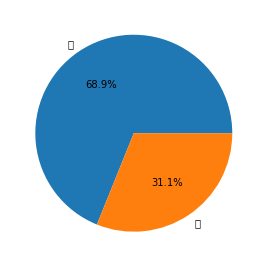

In [13]:
#性别分析
#coding: UTF-8
male = LC[LC['性别'] == '男']
female = LC[LC['性别'] == '女']
sex = (male,female)
sex_data = (male['借款金额'].sum(), female['借款金额'].sum())
sex_idx = ('男', '女')
matplotlib.pyplot.figure(figsize=(15, 6))
matplotlib.pyplot.subplot(1,3,1)
matplotlib.pyplot.pie(sex_data, labels=sex_idx, autopct='%.1f%%')

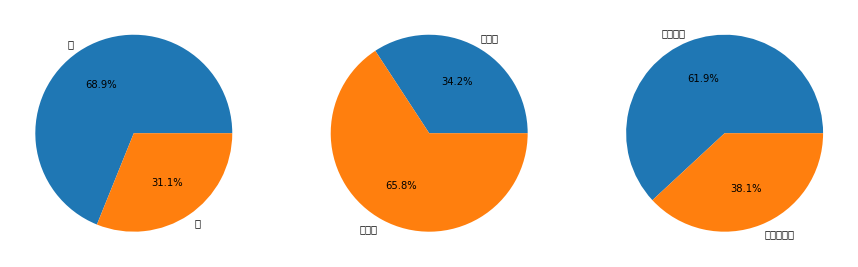

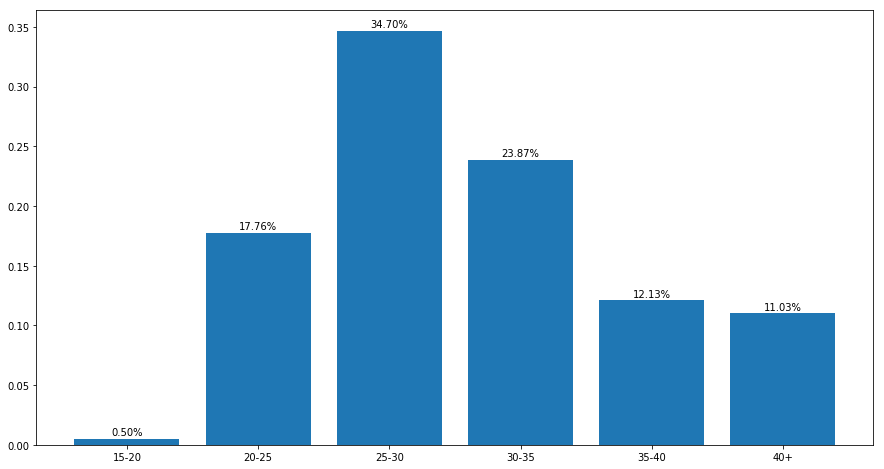

In [14]:
#性别分析
male = LC[LC['性别'] == '男']
female = LC[LC['性别'] == '女']
sex = (male,female)
sex_data = (male['借款金额'].sum(), female['借款金额'].sum())
sex_idx = ('男', '女')
matplotlib.pyplot.figure(figsize=(15, 6))
matplotlib.pyplot.subplot(1,3,1)
matplotlib.pyplot.pie(sex_data, labels=sex_idx, autopct='%.1f%%')

#新老客户分析
new = LC[LC['是否首标'] == '是']
old = LC[LC['是否首标'] == '否']
newold_data = (new['借款金额'].sum(), old['借款金额'].sum())
newold_idx = ('新客户', '老客户')
matplotlib.pyplot.subplot(1,3,2)
matplotlib.pyplot.pie(newold_data, labels=newold_idx, autopct='%.1f%%')

#学历分析
ungraduate = LC[LC['学历认证'] == '未成功认证']
graduate = LC[LC['学历认证'] == '成功认证']
education_data = (ungraduate['借款金额'].sum(), graduate['借款金额'].sum())
education_idx = ('大专以下', '大专及以上')
matplotlib.pyplot.subplot(1,3,3)
matplotlib.pyplot.pie(education_data, labels=education_idx, autopct='%.1f%%')
matplotlib.pyplot.show()

#年龄分析
ageA = LC.loc[(LC['年龄'] >= 15) & (LC['年龄'] < 20)]
ageB = LC.loc[(LC['年龄'] >= 20) & (LC['年龄'] < 25)]
ageC = LC.loc[(LC['年龄'] >= 25) & (LC['年龄'] < 30)]
ageD = LC.loc[(LC['年龄'] >= 30) & (LC['年龄'] < 35)]
ageE = LC.loc[(LC['年龄'] >= 35) & (LC['年龄'] < 40)]
ageF = LC.loc[LC['年龄'] >= 40]
age = (ageA, ageB, ageC, ageD, ageE, ageF)
age_total = 0
age_percent =[]
for i in age:
    tmp = i['借款金额'].sum()
    age_percent.append(tmp)
    age_total  += tmp
age_percent /= age_total
age_idx = ['15-20', '20-25', '25-30', '30-35', '35-40', '40+']
matplotlib.pyplot.figure(figsize=(15, 8))
matplotlib.pyplot.bar(age_idx, age_percent)
for (a, b) in zip(age_idx, age_percent):
    matplotlib.pyplot.text(a, b+0.001, '%.2f%%' % (b * 100), ha='center', va='bottom', fontsize=10)
matplotlib.pyplot.show()


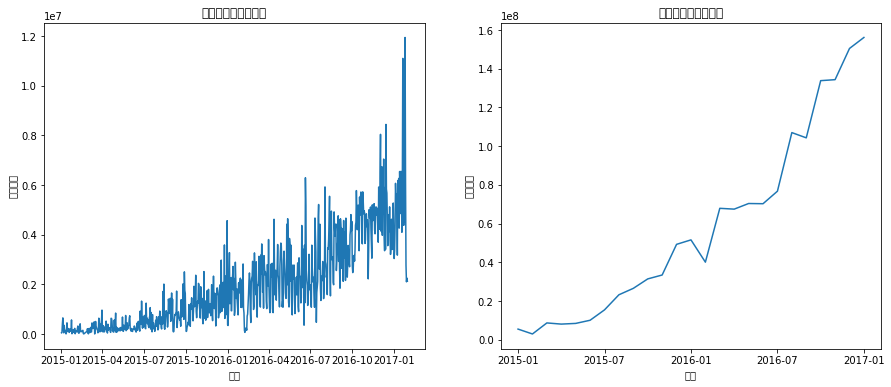

每日的借款金额 5204663.8 
 标准差 2203394.1435809094


In [15]:
from datetime import datetime

#分析每日贷款金额的走势
loan = LC[['借款成功日期', '借款金额']].copy()
loan['借款日期'] = pandas.to_datetime(loan['借款成功日期'])
loan1 = loan.pivot_table(index='借款日期', aggfunc='sum').copy()
matplotlib.pyplot.figure(figsize=(15, 6))
matplotlib.pyplot.subplot(1,2,1)
matplotlib.pyplot.plot(loan1)
matplotlib.pyplot.xlabel('日期')
matplotlib.pyplot.ylabel('借款金额')
matplotlib.pyplot.title('每天贷款金额波动图')

#分析每月贷款金额的走势
loan['借款成功月份'] = [datetime.strftime(x, '%Y-%m') for x in loan['借款日期']]
loan2 = loan.pivot_table(index='借款成功月份', aggfunc='sum').copy()
matplotlib.pyplot.subplot(1,2,2)
matplotlib.pyplot.plot(loan2)
matplotlib.pyplot.xlabel('月份')
matplotlib.pyplot.xticks(['2015-01','2015-07','2016-01','2016-07','2017-01'])
matplotlib.pyplot.ylabel('借款金额')
matplotlib.pyplot.title('每月贷款金额波动图')
matplotlib.pyplot.show()

# 对2017年1月的数据继续进行分析，并求出平均值和标准差
loan3 = loan1.loc['2017-01']
avg = loan3['借款金额'].mean()
std = loan3['借款金额'].std()
print('每日的借款金额',avg,'\n','标准差',std)

结论：

1.每日贷款金额呈现的是一个往上的趋势,但是每天的波动较大。

2.每月贷款分析结论：从2015年1月到2017年1月，月度贷款金额呈现上升趋势，上升速度随着时间增快。

3.2017年1月每日的借款金额达到5204664元，标准差为2203394，根据3σ原则，想使每日借款金额充足的概率达到99.9%，则每日公式账上需准备5204664+2203394×3=11814846元。

3.分析逾期还款率（借款人的初始评级、借款类型、性别、年龄、借款金额等特征）

逾期还款率 = 历史逾期还款期数/（历史逾期还款期数+历史正常还款期数）

## 分析逾期还款率（借款人的初始评级、借款类型、性别、年龄、借款金额等特征）

In [5]:
# 初始评级的数据划分
level_idx = ('A', 'B', 'C', 'D', 'E', 'F')
lev = []
for i in level_idx:
    temp = LC[LC['初始评级'] == i]
    lev.append(temp)
    print('lev is',lev[:10])

741   5968    12  22.0  2017-01-28    E   普通    否  25  男  ...   
326869   32707971   4000    12  22.0  2017-01-29    E   其他    否  31  女  ...   
326883   32709511   2299    12  22.0  2017-01-28    E   其他    否  36  男  ...   
326949   32713711   2000    12  22.0  2017-01-29    E   普通    否  28  女  ...   
326975   32714311   3500    12  22.0  2017-01-29    E   其他    否  44  男  ...   
326986   32714521   3751    12  22.0  2017-01-29    E   普通    否  23  男  ...   
327000   32715121   3196    12  22.0  2017-01-29    E   普通    否  50  男  ...   
327004   32715191   3888    12  22.0  2017-01-29    E   其他    否  29  男  ...   
327063   32717571   6004    12  22.0  2017-01-29    E   普通    否  24  女  ...   
327106   32720051   2037    12  22.0  2017-01-29    E   普通    否  32  男  ...   
327144   32722551   4652    12  22.0  2017-01-29    E   普通    否  33  男  ...   
327195   32726091   2647    12  22.0  2017-01-29    E   其他    否  26  男  ...   
327278   32733781   2000    12  22.0  2017-01-29    E   其他    否  2

In [6]:
# 借款类型的数据划分
kind_idx = ('电商', 'APP闪电', '普通', '其他')
kind = []
for i in kind_idx:
    temp = LC[LC['借款类型'] == i]
    kind.append(temp)
    print('kind is',kind[:10])


328423   32808831   4000    12  22.0  2017-01-30    D   普通    否  25  男  ...   
328426   32808971   2000     6  20.0  2017-01-30    C   普通    否  31  男  ...   
328427   32809011   2416     6  20.0  2017-01-30    C   普通    否  23  男  ...   
328429   32809061   4931     6  20.0  2017-01-30    C   普通    否  25  男  ...   
328432   32809531   7133     3  16.0  2017-01-30    A   普通    否  38  女  ...   
328445   32810171   5500    12  22.0  2017-01-30    D   普通    否  34  男  ...   
328454   32810981   5630     6  20.0  2017-01-30    C   普通    否  34  女  ...   
328463   32811681   4180    12  22.0  2017-01-30    C   普通    否  35  男  ...   
328466   32811931   4202     9  20.0  2017-01-30    C   普通    否  33  女  ...   
328467   32811991   4565    12  22.0  2017-01-30    D   普通    否  33  男  ...   
328469   32812111   6000    12  22.0  2017-01-30    D   普通    是  37  女  ...   
328475   32812651   5089    12  20.0  2017-01-30    C   普通    否  28  男  ...   
328477   32812681   2482    12  22.0  2017-01-30   

In [9]:
# 不同借款金额的数据划分
amount_idx = ('0-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+')
amountA = LC.loc[(LC['借款金额'] > 0) & (LC['借款金额'] < 2000)]
amountB = LC.loc[(LC['借款金额'] >= 2000) & (LC['借款金额'] < 3000)]
amountC = LC.loc[(LC['借款金额'] >= 3000) & (LC['借款金额'] < 4000)]
amountD = LC.loc[(LC['借款金额'] >= 4000) & (LC['借款金额'] < 5000)]
amountE = LC.loc[(LC['借款金额'] >= 5000) & (LC['借款金额'] < 6000)]
amountF = LC.loc[(LC['借款金额'] >= 6000)]
amount = (amountA, amountB, amountC, amountD, amountE, amountF)
print(amountA)

ListingId  借款金额  借款期限  借款利率      借款成功日期 初始评级   借款类型 是否首标  年龄 性别  ...  \
74        1576841  1000     7  23.0  2015-01-05    F     普通    是  21  男  ...   
89        1582411  1000     7  23.0  2015-01-06    D     普通    否  22  男  ...   
93        1583681  1000     7  23.0  2015-01-05    F     普通    是  23  男  ...   
102       1586811  1000     7  23.0  2015-01-04    D     普通    否  21  男  ...   
107       1590171  1000     1  18.0  2015-01-04    E     其他    是  25  男  ...   
109       1591511  1000     7  23.0  2015-01-04    C     普通    否  22  男  ...   
112       1594211  1000     7  23.0  2015-01-05    F     普通    是  23  男  ...   
115       1594971  1000     7  23.0  2015-01-05    F     普通    是  23  男  ...   
119       1595971  1000     7  23.0  2015-01-05    F     普通    是  25  男  ...   
123       1598531  1000     7  23.0  2015-01-06    F     普通    是  21  男  ...   
132       1603711  1000     7  23.0  2015-01-07    F     普通    是  21  男  ...   
135       1605291  1000     7  23.0  2015-01-05 

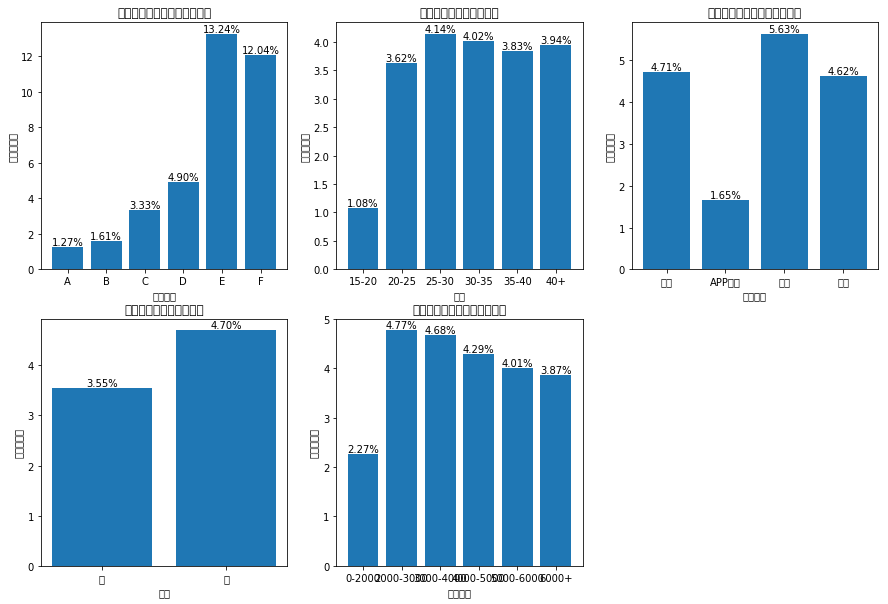

In [11]:
#性别分析
male = LC[LC['性别'] == '男']
female = LC[LC['性别'] == '女']
sex = (male,female)
sex_data = (male['借款金额'].sum(), female['借款金额'].sum())
sex_idx = ('男', '女')
#新老客户分析
new = LC[LC['是否首标'] == '是']
old = LC[LC['是否首标'] == '否']
newold_data = (new['借款金额'].sum(), old['借款金额'].sum())
newold_idx = ('新客户', '老客户')
#学历分析
ungraduate = LC[LC['学历认证'] == '未成功认证']
graduate = LC[LC['学历认证'] == '成功认证']
education_data = (ungraduate['借款金额'].sum(), graduate['借款金额'].sum())
education_idx = ('大专以下', '大专及以上')
#年龄分析
ageA = LC.loc[(LC['年龄'] >= 15) & (LC['年龄'] < 20)]
ageB = LC.loc[(LC['年龄'] >= 20) & (LC['年龄'] < 25)]
ageC = LC.loc[(LC['年龄'] >= 25) & (LC['年龄'] < 30)]
ageD = LC.loc[(LC['年龄'] >= 30) & (LC['年龄'] < 35)]
ageE = LC.loc[(LC['年龄'] >= 35) & (LC['年龄'] < 40)]
ageF = LC.loc[LC['年龄'] >= 40]
age = (ageA, ageB, ageC, ageD, ageE, ageF)
age_total = 0
age_percent =[]
for i in age:
    tmp = i['借款金额'].sum()
    age_percent.append(tmp)
    age_total  += tmp
age_percent /= age_total
age_idx = ['15-20', '20-25', '25-30', '30-35', '35-40', '40+']

# 初始评级的数据划分
level_idx = ('A', 'B', 'C', 'D', 'E', 'F')
lev = []
for i in level_idx:
    temp = LC[LC['初始评级'] == i]
    lev.append(temp)
# 借款类型的数据划分
kind_idx = ('电商', 'APP闪电', '普通', '其他')
kind = []
for i in kind_idx:
    temp = LC[LC['借款类型'] == i]
    kind.append(temp)


# 不同借款金额的数据划分
amount_idx = ('0-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+')
amountA = LC.loc[(LC['借款金额'] > 0) & (LC['借款金额'] < 2000)]
amountB = LC.loc[(LC['借款金额'] >= 2000) & (LC['借款金额'] < 3000)]
amountC = LC.loc[(LC['借款金额'] >= 3000) & (LC['借款金额'] < 4000)]
amountD = LC.loc[(LC['借款金额'] >= 4000) & (LC['借款金额'] < 5000)]
amountE = LC.loc[(LC['借款金额'] >= 5000) & (LC['借款金额'] < 6000)]
amountF = LC.loc[(LC['借款金额'] >= 6000)]
amount = (amountA, amountB, amountC, amountD, amountE, amountF)

# LC['Yuqi_huankuan_lv'] = LC['历史逾期还款期数'] / (LC['历史逾期还款期数'] + LC['历史正常还款期数']) * 100
LC['逾期还款率'] = LC['历史逾期还款期数'] / (LC['历史逾期还款期数'] + LC['历史正常还款期数']) * 100


# 逾期还款率的分析图
def depayplot(i, idx, data, xlabel, title, index):
    depay = []
    for a in data:
        tmp = a[index].mean()
        depay.append(tmp)
    matplotlib.pyplot.subplot(2, 3, i)
    matplotlib.pyplot.bar(idx, depay)
    for (a, b) in zip(idx, depay):
        matplotlib.pyplot.text(a, b + 0.001, '%.2f%%' % b, ha='center', va='bottom', fontsize=10)
    matplotlib.pyplot.xlabel(xlabel)
    matplotlib.pyplot.ylabel(index)
    matplotlib.pyplot.title(title)


matplotlib.pyplot.figure(figsize=(15, 10))
# index = 'Yuqi_huankuan_lv'
index = '逾期还款率'

# 根据初始评级对逾期还款率进行分析
depayplot(1, level_idx, lev, '初始评级', '不同初始评级客户逾期还款率', index)

# 根据年龄对逾期还款率进行分析
depayplot(2, age_idx, age, '年龄', '不同年龄客户逾期还款率', index)

# 根据借款类型对逾期还款率进行分析
depayplot(3, kind_idx, kind, '借款类型', '不同借款类型客户逾期还款率', index)

# 根据性别对逾期还款率进行分析
depayplot(4, sex_idx, sex, '性别', '不同性别客户逾期还款率', index)

# 根据借款金额对逾期还款率进行分析
depayplot(5, amount_idx, amount, '借款金额', '不同借款金额客户逾期还款率', index)

matplotlib.pyplot.show()

结论：

1.初始评级对于贷款者的还款能力有比较好的预测作用，EF两级反转可能是因为样本数量较少，ABCD四个等级的平均逾期还款率都比较小，而EF两级明显增大，故公司对于这两类贷款者要谨慎对待。

2.年龄对于逾期率的分布较为平均，25-30岁的年轻人可以重点关注。

3.APP闪电的逾期还款率明显低于其他三种，故公司可以多考虑与“APP闪电”借款类型的合作。

4.女性的逾期率高于男性，可能是由于生活中男性收入较女性高造成的。

5.借款金额在2000以下的逾期还款率最低，2000-3000之间的最高。可以多考虑小额贷款降低逾期风险。

4.分析借款利率（借款人的初始评级、借款类型、性别、年龄、借款金额等特征）

哪些客户群体更愿意接受较高的借款利率？

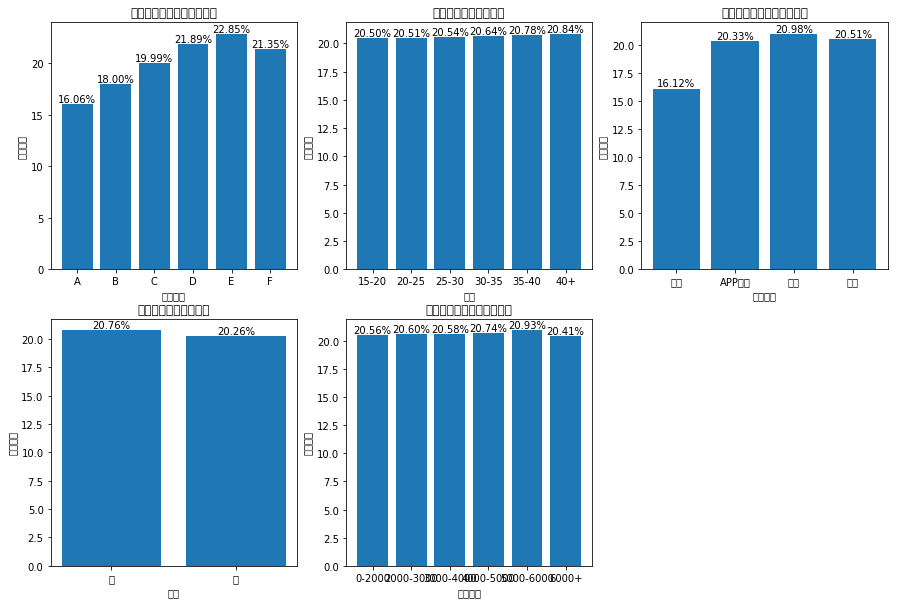

In [13]:
#借款利率的分析图
matplotlib.pyplot.figure(figsize=(15, 10))
index1 = '借款利率'

# 根据初始评级对借款利率进行分析
depayplot(1,level_idx,lev,'初始评级','不同初始评级客户借款利率',index1)

# 根据年龄对借款利率进行分析
depayplot(2,age_idx,age,'年龄','不同年龄客户借款利率',index1)

# 根据借款类型对借款利率进行分析
depayplot(3,kind_idx,kind,'借款类型','不同借款类型客户借款利率',index1)

# 根据性别对借款利率进行分析
depayplot(4,sex_idx,sex,'性别','不同性别客户借款利率',index1)

# 根据借款金额对借款利率进行分析
depayplot(5,amount_idx,amount,'借款金额','不同借款金额客户借款利率',index1)

matplotlib.pyplot.show()

结论：

1.年龄对于借款利率的分布较为平均，差异性很小。

2.初始评级的平均借款利率由小到大排列为ABCDFDE。

3.电商的借款利率明显低于其他三种。

4.女性所能接受的借款利率低于男性。

5.借款金额对于借款利率的分布较为平均，差异性很小。

对于以上四个问题综合分析LC数据集：

1、“男性”、“回头客”、“中青年”是拍拍贷用户群体的主要特征。

2、每日公司账上需准备7,283,728元，方可保证出现当日出借金额不足的可能性小于0.1%。

3、“初始评级”为D的群体，借款利率与E，F大致相当，但其逾期还款率却只有E，F群体的三分之一，相同的收益水平下风险大大降低，应多发展评级为D的客户或提高其贷款额度。

4、通过“app闪电”贷款的逾期还款率远低于其他项，约为其他借款类型的三分之一至四分之一，而平均借款利率却和其他项相差不大，证明“app闪电”是该公司优质的合作方，其所引流来得客户质量很高，“拍拍贷”应与“app闪电”继续加深合作。

5、“电商”中的贷款客户，收益率水平明显较低，逾期率却不低，在该群体中的贷款收益小，风险大。

6、从性别上看，男性群体贷款利率较高，逾期风险较小，相较女性一定程度上是更为优质的客户，但并不明显。

## LCLP数据集分析用户的还款情况

基于LCLP 数据，分析用户的还款习惯（提前一次性全部还款 、部分提前还款以及逾期还款）的金额占比。

将数据集按借款金额分组，并按还款状态和还款日期分成四种还款情况并进行统计：

（1）一次性全部还款：其还款状态标记为‘已提前还清该标全部欠款’；

（2）部分提前还款：其还款状态标记为’已正常还款’，并且当期的还款日期早于到期日期；

（3）正常还款：其还款状态标记为’已正常还款’，并且当期的还款日期即为到期日期；

（4）逾期还款：还款状态标记为‘未还款’，‘已逾期还款’或者‘已部分还款’。

用百分堆积柱状图展示在不同年龄段（15 -20 ，20 -25 ，25 -30 ， 30-35 ，35 -40 ，40+ ）,不同性别（ 男、女），不同初始评级（A-F），不同借款类型、不同借款金额（1-1000，1000 -2000，2000-3000，3000+）、不同期数（1-24）的走势。

In [16]:
file_LP='data_paipai/LP.csv'
LP=pandas.read_csv(file_LP)
# 删除尚未到期的记录
LP = LP[LP['到期日期'] <= LP['recorddate']]
#LP.info()
#LP.describe()
# 将LC和LP两个表融合起来
LCLP = pandas.merge(LC, LP, how='left', on=['ListingId'])
# 删除数据不全的记录
LCLP = LCLP.dropna(how='any')
# LCLP.info()
#LCLP.describe()

In [17]:
#定义用户还款习惯分析可视化函数
def repayhabit(group,num,idx,xlabel,color):
    # 一次性全部还款
    onetime = []
    for a in group:
        ot = a.loc[a['还款状态'] == 3]['应还本金'].sum(
            ) + a.loc[a['还款状态'] == 3]['应还利息'].sum()
        onetime.append(ot)
    # 部分提前还款
    partial = []
    for a in group:
        pa = a.loc[(a['还款状态'] == 1) & (a['还款日期'] < a['到期日期'])]['应还本金'].sum(
            ) + a.loc[(a['还款状态'] == 1) & (a['还款日期'] < a['到期日期'])]['应还利息'].sum()
        partial.append(pa)
    # 逾期还款
    pastdue = []
    for a in group:
        pas = a.loc[(a['还款状态'] == 2) | (a['还款状态'] == 4)|(a['还款状态'] == 0)]['应还本金'].sum() + \
            a.loc[(a['还款状态'] == 2) | (a['还款状态'] == 4)|(a['还款状态'] == 0)]['应还利息'].sum()
        pastdue.append(pas)
    # 正常还款
    normal = []
    for a in group:
        nm = a.loc[(a['还款状态'] == 1) & (a['还款日期'] == a['到期日期'])]['应还本金'].sum(
        ) + a.loc[(a['还款状态'] == 1) & (a['还款日期'] == a['到期日期'])]['应还利息'].sum()
        normal.append(nm)
    
    tot = []
    for i in range(num):
        t = onetime[i]+partial[i]+pastdue[i]+normal[i]
        tot.append(t)

    print(tot)

    temp = []
    for i in range(num):
        tp = (100 * onetime[i] / tot[i], 100 * partial[i] / tot[i],
                100 * normal[i] / tot[i], 100 * pastdue[i] / tot[i])
        temp.append(tp)
        
    df = pandas.DataFrame(temp)
    df.index = idx
    df.columns = ('提前一次性', '部分提前', '正常', '逾期')
    print(df)

    df.plot(kind='bar', colormap=color, stacked=True)
    matplotlib.pyplot.ylabel('还款金额')
    matplotlib.pyplot.xlabel(xlabel)
    matplotlib.pyplot.legend(loc='best')
    matplotlib.pyplot.show()

[28456834.85, 69903191.44000001, 99595369.9, 72161874.03, 51083566.29000001, 269236628.2506]
               提前一次性       部分提前         正常         逾期
0-2000     10.204426  60.954742  16.233811  12.607020
2000-3000  10.208217  54.959603  20.400835  14.431346
3000-4000  14.874141  50.961604  21.902815  12.261440
4000-5000  14.678874  50.698304  22.775784  11.847038
5000-6000  15.703463  50.299053  23.239861  10.757622
6000+      11.688029  39.376116  39.790049   9.145806


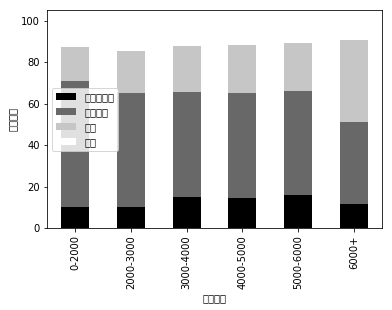

In [18]:
# 分析不同借款金额用户的还款情况
amountA = LCLP.loc[(LCLP['借款金额'] > 0) & (LCLP['借款金额'] < 2000)]
amountB = LCLP.loc[(LCLP['借款金额'] >= 2000) & (LCLP['借款金额'] < 3000)]
amountC = LCLP.loc[(LCLP['借款金额'] >= 3000) & (LCLP['借款金额'] < 4000)]
amountD = LCLP.loc[(LCLP['借款金额'] >= 4000) & (LCLP['借款金额'] < 5000)]
amountE = LCLP.loc[(LCLP['借款金额'] >= 5000) & (LCLP['借款金额'] < 6000)]
amountF = LCLP.loc[(LCLP['借款金额'] >= 6000)]
amountgroup = [amountA, amountB, amountC, amountD,amountE,amountF]

repayhabit(amountgroup,6,amount_idx,'借款金额','Greys_r')

在根据借款金额分组中，得到结果如下：

A组（0-2000）：总金额2.85千万。（1）一次性全部还款：占比 10.20%；（2）部分提前还款：占比60.95%；（3）正常还款：占比 16.23%； （4）逾期还款：占比 12.61%。

B组（2000-3000）：总金额 7千万。（1）一次性全部还款：占比 10.21%；（2）部分提前还款：占比54.96%；（3）正常还款：占比 20.40%； （4）逾期还款：占比 14.43%。

C组（3000-4000）：总金额 10千万。（1）一次性全部还款：占比 14.87%；（2）部分提前还款：占比50.96%；（3）正常还款：占比 21.90%； （4）逾期还款：占比 12.26%。

D组（4000-5000）：总金额 7.22千万。（1）一次性全部还：占比 14.68%；（2）部分提前还款：占比50.70%；（3）正常还款：占比 22.78%； （4）逾期还款：占比 11.85%。

E组（5000-6000）：总金额 5.11千万。（1）一次性全部还款：占比 15.70%；（2）部分提前还款：占比50.30%；（3）正常还款：占比 23.24%； （4）逾期还款：占比 10.76%。

F组（6000+）：总金额 26.92千万。（1）一次性全部还款：占比 11.69%；（2）部分提前还款：占比39.38%；（3）正常还款：占比 39.79%； （4）逾期还款：占比 9.15%。

从对借款金额分组的统计结果以及上图结果中可以看出：

（1）借款总额6000元以上最多，3000-4000其次，说明3000-4000元的借款金额是最多的。

（2）逾期风险在各金额组表现比较平均，其中2000-3000最大，6000+最小。

（3）随着标的金额增加，部分提前还款的总金额比例在减少，正常还款的总金额比例在增加。

[1325708.5400000003, 85978811.91999999, 203407279.9106, 149443150.8962, 79947743.0043, 70334770.4895]
           提前一次性       部分提前         正常         逾期
15-20  10.441107  62.896452  13.114767  13.547674
20-25  13.428313  53.199581  20.048697  13.323409
25-30  14.002901  47.665900  26.687108  11.644091
30-35  12.363756  43.932650  33.824134   9.879460
35-40  10.805522  44.388718  34.672769  10.132990
40+    10.882495  42.854777  37.205296   9.057432


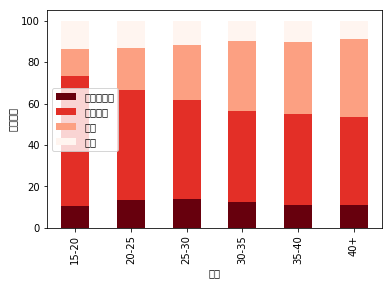

In [19]:
ageA = LCLP.loc[(LCLP['年龄'] >= 15) & (LCLP['年龄'] < 20)]
ageB = LCLP.loc[(LCLP['年龄'] >= 20) & (LCLP['年龄'] < 25)]
ageC = LCLP.loc[(LCLP['年龄'] >= 25) & (LCLP['年龄'] < 30)]
ageD = LCLP.loc[(LCLP['年龄'] >= 30) & (LCLP['年龄'] < 35)]
ageE = LCLP.loc[(LCLP['年龄'] >= 35) & (LCLP['年龄'] < 40)]
ageF = LCLP.loc[LCLP['年龄'] >= 40]
agegroup = [ageA, ageB, ageC, ageD, ageE, ageF]

repayhabit(agegroup,6,age_idx,'年龄','Reds_r')

在年龄分组中，得到结果如下：

A组（15-20岁）：总金额0.13千万。（1）一次性全部还款：占比 10.44%；（2）部分提前还款：占比62.90%；（3）正常还款：占比 13.11%； （4）逾期还款：占比 13.55%。

B组（20-25岁）：总金额 8.60千万。（1）一次性全部还款：占比 13.43%；（2）部分提前还款：占比53.2%；（3）正常还款：占比 20.05%； （4）逾期还款：占比 13.32%。

C组（25-30岁）：总金额 20.34千万。（1）一次性全部还款：占比 14.00%；（2）部分提前还款：占比47.67%；（3）正常还款：占比 26.69%； （4）逾期还款：占比 11.64%。

D组（30-35岁）：总金额 14.94千万。（1）一次性全部还款：占比 12.36%；（2）部分提前还款：占比43.92%；（3）正常还款：占比 33.82%； （4）逾期还款：占比 9.88%。

E组（35-40岁）：总金额 8.00千万。（1）一次性全部还款：占比 10.81%；（2）部分提前还款：占比44.39%；（3）正常还款：占比 34.67%； （4）逾期还款：占比 10.13%。

F组（40岁+）：总金额 7.03千万。（1）一次性全部还款：占比 10.88%；（2）部分提前还款：占比42.85%；（3）正常还款：占比 37.21%； （4）逾期还款：占比 9.06%。

从对年龄分组的统计结果以及上图结果中可以看出：

（1）拍拍贷的客户群体中25-30岁年龄组的贷款金额最高，15-20岁最低；

（2）各年龄组的还款习惯大体一致，从金额上来说，部分提前还款和正常还款是最常用的方式；

（3）逾期还款风险最高的年龄组为15-20岁组；

（4）25-30岁年龄组一次性提前还款的金额占比最高。

[431899402.1953, 158538062.5653]
       提前一次性       部分提前         正常         逾期
男  13.159444  45.775236  30.093425  10.971895
女  11.417458  48.638828  29.114713  10.829001


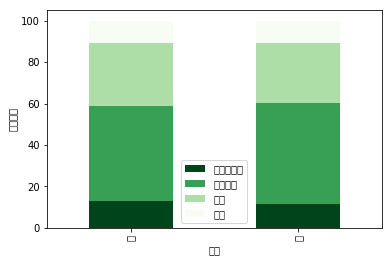

In [20]:
# 分析不同性别用户的还款情况
male = LCLP.loc[LCLP['性别'] == "男"]
female = LCLP.loc[LCLP['性别'] == "女"]
sexgroup = (male,female)

repayhabit(sexgroup,2,sex_idx,'性别','Greens_r')

在男女性别组中，得到结果如下：

男性：总还款金额 43.19千万。（1）一次性全部还款占比 13.16%；（2）部分提前还款占比45.78%；（3）正常还款占比 30.09%； （4）逾期还款占比10.97%。

女性：总还款金额 15.85千万。（1）一次性全部还款占比 11.42%；（2）部分提前还款占比48.64%；（3）正常还款占比29.11%； （4）逾期还款占比10.83%。

从对男女性别组的统计结果以及上图结果中可以看出：

（1）拍拍贷男性客户的贷款金额约为女性客户的2.7倍；

（2）男性及女性的还款习惯大体上比较一致，从金额上来说，部分提前还款>正常还款>一次性提前还款>逾期还款；

（3）男性客户一次性提前还款的金额占比较女性为高；

（4）女性逾期还款的风险略低于男性；

（5）女性部分提前还款的金额占比略大于男性。

[24260113.047399998, 129789781.91, 292672443.2151, 131419854.39039999, 10771732.247699998, 1523539.95]
       提前一次性       部分提前         正常         逾期
A  10.951641  42.540019  39.727788   6.780552
B   7.686131  37.447042  47.651688   7.215139
C  14.192953  49.919494  24.995052  10.892502
D  14.592841  49.269359  21.846049  14.291750
E  13.213394  40.965391  22.906776  22.914440
F  10.752586  41.241621  20.679682  27.326111


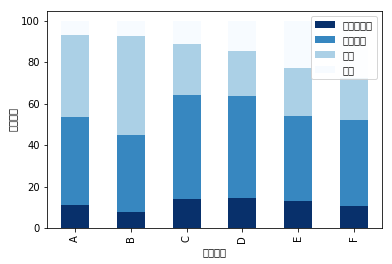

In [21]:
# 分析不同初始评级客户的还款情况
levelgroup = []
for i in level_idx:
    l = LCLP[(LCLP['初始评级'] == i)]
    levelgroup.append(l)
    
repayhabit(levelgroup,6,level_idx,'初始评级','Blues_r')

在初始评级分组中，得到结果如下：

A级：总金额2.43千万。（1）一次性全部还款：占比 10.95%；（2）部分提前还款：占比42.54%；（3）正常还款：占比 39.73%； （4）逾期还款：占比 6.78%。

B级：总金额 12.98千万。（1）一次性全部还款：占比 7.68%；（2）部分提前还款：占比37.45%；（3）正常还款：占比 47.65%； （4）逾期还款：占比 7.22%。

C级：总金额 29.27千万。（1）一次性全部还款：占比 14.19%；（2）部分提前还款：占比49.92%；（3）正常还款：占比 25.00%； （4）逾期还款：占比 10.89%。

D级：总金额 13.14千万。（1）一次性全部还款：占比 14.59%；（2）部分提前还款：占比49.27%；（3）正常还款：占比 21.85%； （4）逾期还款：占比 14.29%。

E级：总金额 1.08千万。（1）一次性全部还款：占比 13.21%；（2）部分提前还款：占比40.97%；（3）正常还款：占比 22.91%； （4）逾期还款：占比 22.91%。

F级：总金额 0.15千万。（1）一次性全部还款：占比 10.75%；（2）部分提前还款：占比41.24%；（3）正常还款：占比 20.68%； （4）逾期还款：占比 27.33%。



从对初始评级分组的统计结果可以看出：

（1）B级客户借款总额最多，占到了大约50%的金额。B、C、D级客户是借款的主力军。

（2）提前一次性还款的占比相对比较平均，其中D级最大为14.59%。

（3）逾期风险随着级别而呈总体增加趋势，F级客户的逾期占比达到了27.33%。

（4）部分提前和正常还款还是占到了大多数。

（5）总的来说，初始评级具有重要的参考意义。

[85700890.47, 74452365.96, 234675993.36, 195608214.9706]
           提前一次性       部分提前         正常         逾期
电商      4.218635  26.927505  62.071671   6.782188
APP闪电   8.959958  61.125398  18.677700  11.236944
普通     17.162002  45.092948  26.095824  11.649226
其他     12.461221  51.329790  24.430785  11.778204


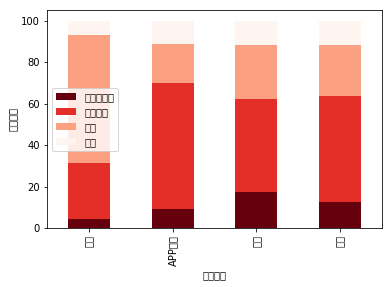

In [22]:
# 分析不同借款类型客户的还款情况
kindgroup = []
for i in kind_idx:
    l = LCLP[(LCLP['借款类型'] == i)]
    kindgroup.append(l)
    
repayhabit(kindgroup,4,kind_idx,'借款类型','Reds_r')

在借款类型分组中，得到结果如下：

电商：总金额8.57千万。（1）一次性全部还款：占比 4.22%；（2）部分提前还款：占比26.93%；（3）正常还款：占比 62.07%； （4）逾期还款：占比 6.78%。

APP闪电：总金额 7.45千万。（1）一次性全部还款：占比 8.96%；（2）部分提前还款：占比61.13%；（3）正常还款：占比 18.68%； （4）逾期还款：占比11.24%。

普通：总金额 23.47千万。（1）一次性全部还款：占比 17.16%；（2）部分提前还款：占比45.09%；（3）正常还款：占比 26.10%； （4）逾期还款：占比 11.65%。

其他：总金额 19.56千万。（1）一次性全部还款：占比 12.46%；（2）部分提前还款：占比51.33%；（3）正常还款：占比 24.43%； （4）逾期还款：占比 11.78%。



从对借款类型分组的统计结果可以看出：

（1）普通借款类型的借款金额总数最大，其次是其他，电商和APP闪电差不多。

（2）逾期风险电商最低，为6.78%。其他三种类型差不多。

（3）部分提前和正常还款还是占到了大多数。值得注意的是除了电商，其他三种类型的部分提前还款都占比很大。

[135981578.1922, 108408463.47999999, 93715601.03, 75294688.9507, 60648276.0339, 47917912.09030001, 19092666.1202, 15699880.5325, 12331986.870000001, 9339947.0008, 6687098.62, 4416541.7700000005, 301461.70999999996, 169327.15999999997, 143667.96000000002, 83483.42, 69138.15, 50308.28, 36507.18, 19895.030000000002, 17235.37, 7340.29, 4459.52, 0.0]
        提前一次性       部分提前         正常         逾期
1   11.445900  47.586534  33.902811   7.064756
2   12.167250  50.653062  28.728319   8.451370
3   15.843928  46.505031  28.396910   9.254131
4   14.029461  44.266042  30.340452  11.364045
5   12.805724  44.175306  30.414081  12.604889
6    9.611442  44.158815  31.276022  14.953720
7   15.717427  44.974685  22.785384  16.522504
8   14.343482  44.269646  23.244959  18.141913
9   11.168077  44.718088  23.378983  20.734852
10  10.209341  44.175032  23.368664  22.246963
11   7.335732  43.147448  24.866896  24.649924
12   3.498742  46.299654  23.112021  27.089583
13  40.902773  19.437918  24.870807  14.7

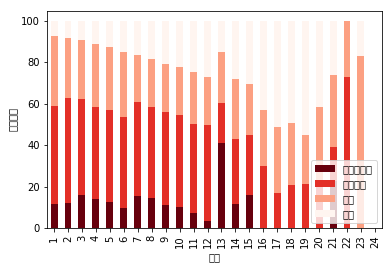

In [23]:
term_idx = ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24')
termgroup = []
for i in range(1,25):
    term = LCLP.loc[(LCLP['期数'] == i)]
    termgroup.append(term)

repayhabit(termgroup,24,term_idx,'期数','Reds_r')

从对期数分组的统计结果可以看出：

（1）借款金额是随着期数增加呈现出下降的趋势。

（2）不同的还款行为在不同的借款期限下的表现差异比较大，部分提前还款和正常还款是最常用的方式；

（3）逾期风险随着借款期限变长而呈总体增加趋势，期限为20个月的逾期金额占比为最高，达到了57.30%；

（4）期限为13个月的提前一次性还款占比最高，达到了16.77%。

（5）借款期限太长的样本数量太少，不能排除偶然性。

## 计算金额催收回款率（催收回本金/所有逾期本金）
在不同等级（A-F）、不同借款期数（1-24）和不同借款金额（0-2000，2000-3000，3000-4000，4000-5000，5000-6000，6000+）等，随逾期天数增加而呈现的走势。

1）x轴为逾期天数，y轴为金额催收回款率，不同参数对应不同曲线；

2）催收回款的定义为逾期90天之内的逾期还款。

In [26]:
LCLP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023959 entries, 0 to 1603587
Data columns (total 32 columns):
ListingId     1023959 non-null int64
借款金额          1023959 non-null int64
借款期限          1023959 non-null int64
借款利率          1023959 non-null float64
借款成功日期        1023959 non-null object
初始评级          1023959 non-null object
借款类型          1023959 non-null object
是否首标          1023959 non-null object
年龄            1023959 non-null int64
性别            1023959 non-null object
手机认证          1023959 non-null object
户口认证          1023959 non-null object
视频认证          1023959 non-null object
学历认证          1023959 non-null object
征信认证          1023959 non-null object
淘宝认证          1023959 non-null object
历史成功借款次数      1023959 non-null int64
历史成功借款金额      1023959 non-null float64
总待还本金         1023959 non-null float64
历史正常还款期数      1023959 non-null int64
历史逾期还款期数      1023959 non-null int64
逾期还款率         1023959 non-null float64
期数            1023959 non-null float64
还款状态          1

In [27]:
from datetime import datetime,timedelta

LCLP['recorddate'] = pandas.to_datetime(LCLP['recorddate'])
LCLP['到期日期'] = pandas.to_datetime(LCLP['到期日期'])
LCLP['还款日期'] = pandas.to_datetime(LCLP['还款日期'], errors='coerce')
LCLP['lateday'] = LCLP['还款日期']-LCLP['到期日期']

depay = LCLP[LCLP['lateday']>timedelta(days=0)]

In [31]:
#不同等级（A-F）随逾期天数催收还款率的走势
df = depay.groupby(['初始评级','lateday'])['应还本金'].sum()
df.head()

初始评级  lateday
A     1 days     481394.94
      2 days     169925.78
      3 days     114232.70
      4 days     152740.99
      5 days      58711.10
Name: 应还本金, dtype: float64

In [32]:
df1 = df.to_frame().pivot_table(index='lateday',columns = '初始评级', values ='应还本金')
tmp = df1.fillna(0)
df2 = depay.groupby(['初始评级'])['应还本金'].sum()
tmp_1 = tmp[tmp.index <= timedelta(days=90)]
tmp_1 = tmp_1/df2

matplotlib.pyplot.figure(figsize=(15, 8))
for i in range(6):
    matplotlib.pyplot.subplot(2,3,i+1)
    matplotlib.pyplot.plot(range(90),tmp_1[level_idx[i]])
    matplotlib.pyplot.title(level_idx[i])
matplotlib.pyplot.show()

ValueError: unit abbreviation w/o a number

不同等级（A-F）随逾期天数催收还款率的走势大致相同，也就是大部分人都在逾期十天之内还款，说明他们有可能忘记还款；特别是在4、5天的还款的人数和金额最多。